<a href="https://colab.research.google.com/github/Atharv24-Atreus/Pattern_Recogination-/blob/main/PatternExp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Anomalies Detected (low confidence): 17


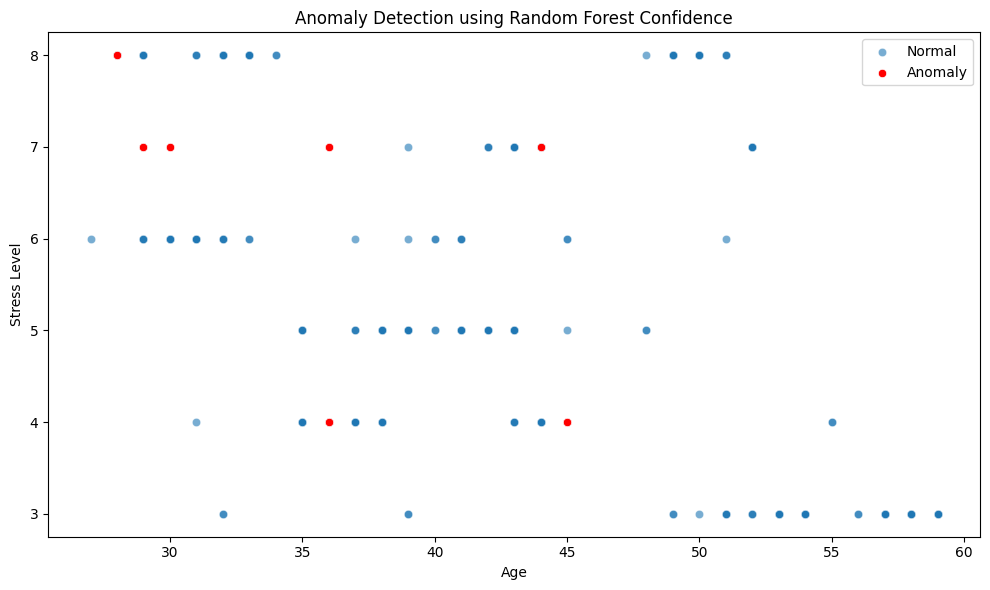

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Drop 'Person ID'
df.drop(columns=["Person ID"], inplace=True)

# Split 'Blood Pressure'
bp_split = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = bp_split[0].astype(int)
df['Diastolic'] = bp_split[1].astype(int)
df.drop(columns=["Blood Pressure"], inplace=True)

# Encode categorical features
label_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Simulate binary classification (you can use 'Sleep Disorder' as a proxy)
X = df.drop(columns=["Sleep Disorder"])
y = df["Sleep Disorder"]

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get prediction probabilities
probs = clf.predict_proba(X)
max_probs = probs.max(axis=1)

# Define threshold: e.g., bottom 5% are anomalies
threshold = np.percentile(max_probs, 5)
df['Anomaly'] = (max_probs < threshold).astype(int)

# Visualize
outliers = df[df['Anomaly'] == 1]
normals = df[df['Anomaly'] == 0]

print(f"Total Anomalies Detected (low confidence): {len(outliers)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=normals, x="Age", y="Stress Level", label="Normal", alpha=0.6)
sns.scatterplot(data=outliers, x="Age", y="Stress Level", label="Anomaly", color='red')
plt.title("Anomaly Detection using Random Forest Confidence")
plt.legend()
plt.tight_layout()
plt.show()
